In [55]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [57]:

df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')

In [58]:
df.head()

timeStamp  demand  precip   temp
0  2012-01-01 00:00:00  4937.5     0.0  46.13
1  2012-01-01 01:00:00  4752.1     0.0  45.89
2  2012-01-01 02:00:00  4542.6     0.0  45.04
3  2012-01-01 03:00:00  4357.7     0.0  45.03
4  2012-01-01 04:00:00  4275.5     0.0  42.61

In [59]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49205 entries, 0 to 49204
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49205 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     48975 non-null  float64       
 3   temp       49019 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.5 MB


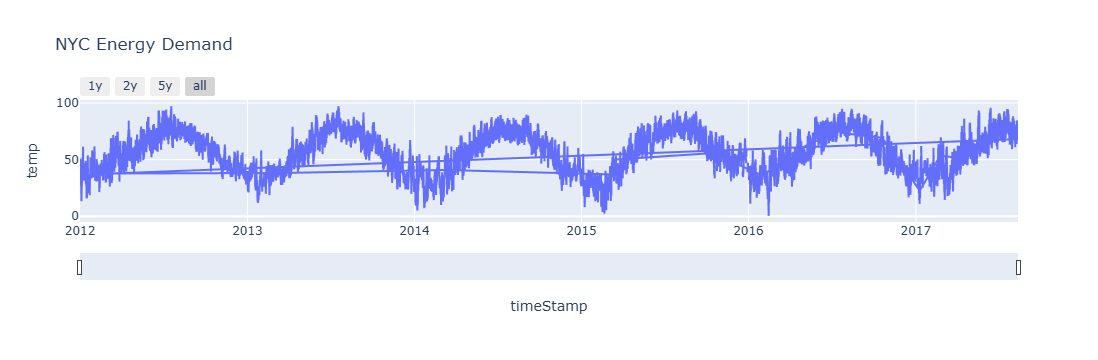

In [61]:
fig = px.line(df,x='timeStamp',y='temp',title= 'NYC Energy Demand')

fig.update_xaxes(
    rangeslider_visible = True,
    rangeselector=dict(
        buttons=list([
            dict(count=1,label="1y",step ="year",stepmode="backward"),
            dict(count=1,label="2y",step ="year",stepmode="backward"),
            dict(count=1,label="5y",step ="year",stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()
            

In [62]:
ny_df=df.set_index('timeStamp')

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

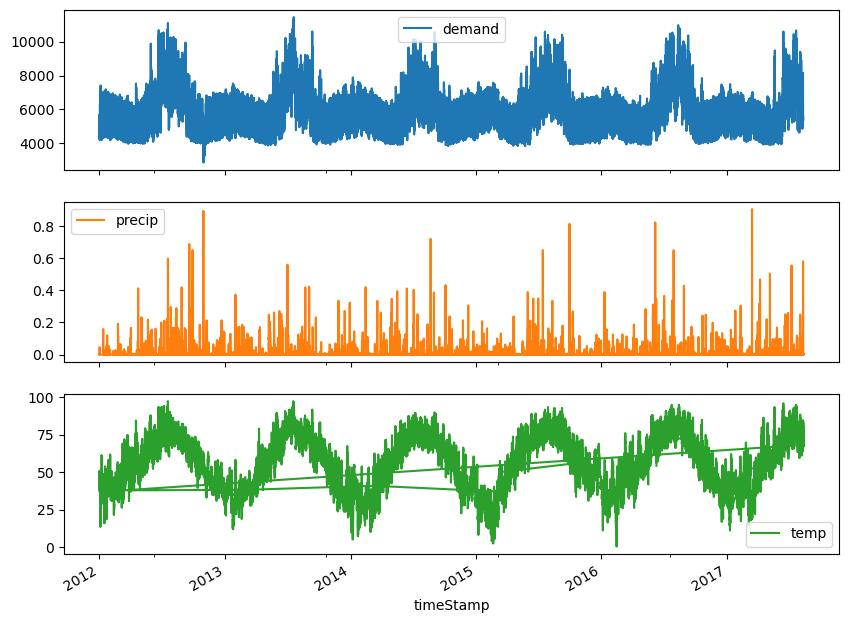

In [63]:
ny_df.plot(subplots=True)

In [68]:

print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().any())
print ("\nUnique values :  \n",df.nunique())

Rows     :  49205
Columns  :  4

Features : 
 ['timeStamp', 'demand', 'precip', 'temp']

Missing values :   timeStamp    False
demand        True
precip        True
temp          True
dtype: bool

Unique values :  
 timeStamp    49205
demand       40972
precip        1004
temp          7580
dtype: int64


In [69]:
df.query('demand != demand')

timeStamp  demand  precip   temp
49124 2012-03-11 02:00:00     NaN  0.0000  37.78
49125 2013-03-10 02:00:00     NaN  0.0000  38.18
49126 2014-03-09 02:00:00     NaN  0.0000  40.86
49127 2015-03-08 02:00:00     NaN  0.0000  36.96
49128 2015-03-11 11:00:00     NaN  0.0000  49.95
...                   ...     ...     ...    ...
49200 2017-08-12 02:00:00     NaN  0.0000  70.84
49201 2017-08-12 03:00:00     NaN  0.0000  70.57
49202 2017-08-12 04:00:00     NaN  0.0000  69.89
49203 2017-08-12 05:00:00     NaN  0.0000  68.59
49204 2017-08-12 06:00:00     NaN  0.0031  67.33

[81 rows x 4 columns]

In [70]:
df['demand']=df['demand'].fillna(method='ffill')
df['temp']=df['temp'].fillna(method='ffill')


C:\Users\rtekem\AppData\Local\Temp\ipykernel_25536\993237123.py:1: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\rtekem\AppData\Local\Temp\ipykernel_25536\993237123.py:2: FutureWarning:

Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



In [71]:
df.isnull().sum()

timeStamp      0
demand         0
precip       230
temp           0
dtype: int64

In [73]:
ny_df=df.set_index('timeStamp')

array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

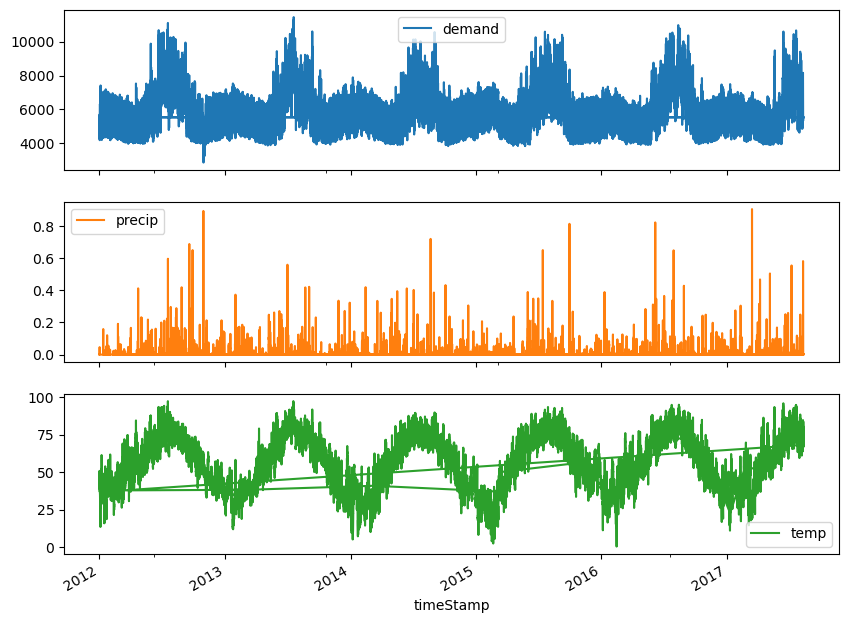

In [75]:
ny_df.plot(subplots=True)

In [77]:
ny_df.resample('M').mean()

C:\Users\rtekem\AppData\Local\Temp\ipykernel_25536\2981089611.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



demand    precip       temp
timeStamp                                   
2012-01-31  5757.495833  0.003116  37.174288
2012-02-29  5622.331609  0.001650  40.448046
2012-03-31  5479.919198  0.001179  49.607917
2012-04-30  5368.945833  0.003959  54.255903
2012-05-31  5867.896102  0.005064  64.188078
...                 ...       ...        ...
2017-04-30  5233.477382  0.002942  55.621764
2017-05-31  5421.773060  0.004031  61.115457
2017-06-30  6597.990346  0.003008  71.962625
2017-07-31  7306.861511  0.002272  76.380363
2017-08-31  6711.707542  0.008961  73.730258

[68 rows x 3 columns]

C:\Users\rtekem\AppData\Local\Temp\ipykernel_25536\1225377362.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



array([<Axes: xlabel='timeStamp'>, <Axes: xlabel='timeStamp'>,
       <Axes: xlabel='timeStamp'>], dtype=object)

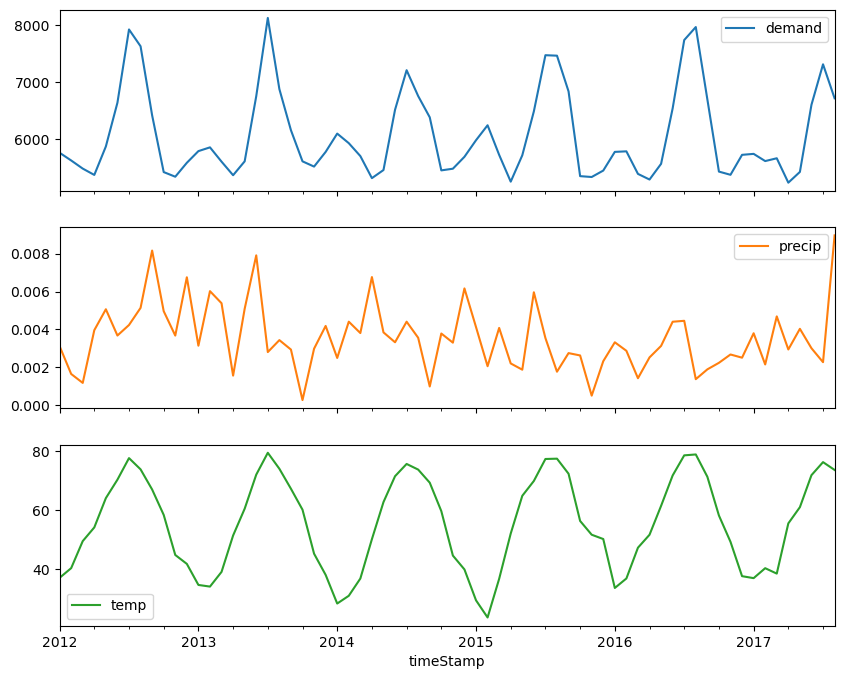

In [79]:
ny_df.resample('M').mean().plot(subplots=True)

In [81]:
ny_df_monthly=ny_df.resample('M').mean()

C:\Users\rtekem\AppData\Local\Temp\ipykernel_25536\614325394.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [83]:

!pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
    --------------------------------------- 10.2/625.1 kB ? eta -:--:--
   ----- ---------------------------------- 81.9/625.1 kB 1.2 MB/s eta 0:00:01
   --------- ------------------------------ 143.4/625.1 kB 1.2 MB/s eta 0:00:01
   ----------------- ---------------------- 266.2/625.1 kB 1.5 MB/s eta 0:00:01
   -------------------- ------------------- 317.4/625.1 kB 1.4 MB/s eta 0:00:01
   ---------------------------- ----------- 450.6/625.1 kB 1.7 MB/s eta 0:00:01
   ---------------------------------------  624.6/625.1 kB 2.0 MB/s eta 0:00:01
   ---------------------------------------- 625.1/625.1 kB 1.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   - -------------------------------------- 0.1/2.8 MB 3.3 MB/s eta 0:00:01
   ---- ----------------------------------- 0.3/2.8 MB 4.5 MB/s eta 0:00:01
   ------- -------------------------------- 0.5/2.8 MB 4.6 MB/s eta 0:00:01
 

In [87]:
import pmdarima as pm

model = pm.auto_arima(ny_df_monthly['demand'],
                     m=12,seasonal=True,
                     start_p=0,start_q=0,max_order=4,test='adf',error_action='ignore',suppress_warning=True,stepwise=True,trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.16 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1100.321, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1023.743, Time=0.15 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1380.758, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1065.516, Time=0.01 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1022.328, Time=0.42 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.73 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=1097.636, Time=0.18 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1020.387, Time=0.55 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1014.059, Time=0.17 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=1021.211, Time=0.04 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=99

In [89]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                   68
Model:             SARIMAX(2, 0, 0)x(0, 0, [1, 2], 12)   Log Likelihood                -490.572
Date:                                 Mon, 16 Dec 2024   AIC                            993.144
Time:                                         16:11:22   BIC                           1006.461
Sample:                                     01-31-2012   HQIC                           998.420
                                          - 08-31-2017                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3721.6223    792.258      4.697      0.000    2168.826    5274.419
ar.L1          0.8586      0.123      6.985      0.000       0.618       1.099
ar.L2         -0.4748      0.142     -3.352      0.001      -0.752      -0.197
ma.S.L12       0.8923      0.137      6.501      0.000       0.623       1.161
ma.S.L24       0.4571      0.206      2.222      0.026       0.054       0.860
sigma2      9.046e+04   1.58e+04      5.726      0.000    5.95e+04    1.21e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 5.55
Prob(Q):                              0.89   Prob(JB):                         0.06
Heteroskedasticity (H):               0.78   Skew:                             0.52
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [91]:
ny_df_monthly


demand    precip       temp
timeStamp                                   
2012-01-31  5757.495833  0.003116  37.174288
2012-02-29  5622.331609  0.001650  40.448046
2012-03-31  5479.919198  0.001179  49.607917
2012-04-30  5368.945833  0.003959  54.255903
2012-05-31  5867.896102  0.005064  64.188078
...                 ...       ...        ...
2017-04-30  5233.477382  0.002942  55.621764
2017-05-31  5421.773060  0.004031  61.115457
2017-06-30  6597.990346  0.003008  71.962625
2017-07-31  7306.861511  0.002272  76.380363
2017-08-31  6711.707542  0.008961  73.730258

[68 rows x 3 columns]

In [93]:

train=ny_df_monthly[(ny_df_monthly.index.get_level_values(0) >= '2012-01-31') & (ny_df_monthly.index.get_level_values(0) <= '2017-04-30')]
test=ny_df_monthly[(ny_df_monthly.index.get_level_values(0) > '2017-04-30')]

In [95]:

test

demand    precip       temp
timeStamp                                   
2017-05-31  5421.773060  0.004031  61.115457
2017-06-30  6597.990346  0.003008  71.962625
2017-07-31  7306.861511  0.002272  76.380363
2017-08-31  6711.707542  0.008961  73.730258

In [97]:

test.shape

(4, 3)

In [99]:
model.fit(train['demand'])

ARIMA(order=(2, 0, 0), scoring_args={}, seasonal_order=(0, 0, 2, 12),
      suppress_warnings=True)

In [101]:
forecast=model.predict(n_periods=4, return_conf_int=True)

In [103]:
forecast

(2017-05-31    5320.832732
 2017-06-30    6194.150570
 2017-07-31    7184.108161
 2017-08-31    7297.999647
 Freq: ME, dtype: float64,
 array([[4724.37017429, 5917.29528995],
        [5391.43559664, 6996.86554311],
        [6358.61998974, 8009.59633287],
        [6467.74938768, 8128.24990638]]))

In [105]:
forecast_df = pd.DataFrame(forecast[0],index = test.index,columns=['Prediction'])

In [107]:
forecast_df

Prediction
timeStamp              
2017-05-31  5320.832732
2017-06-30  6194.150570
2017-07-31  7184.108161
2017-08-31  7297.999647

<Axes: xlabel='timeStamp'>

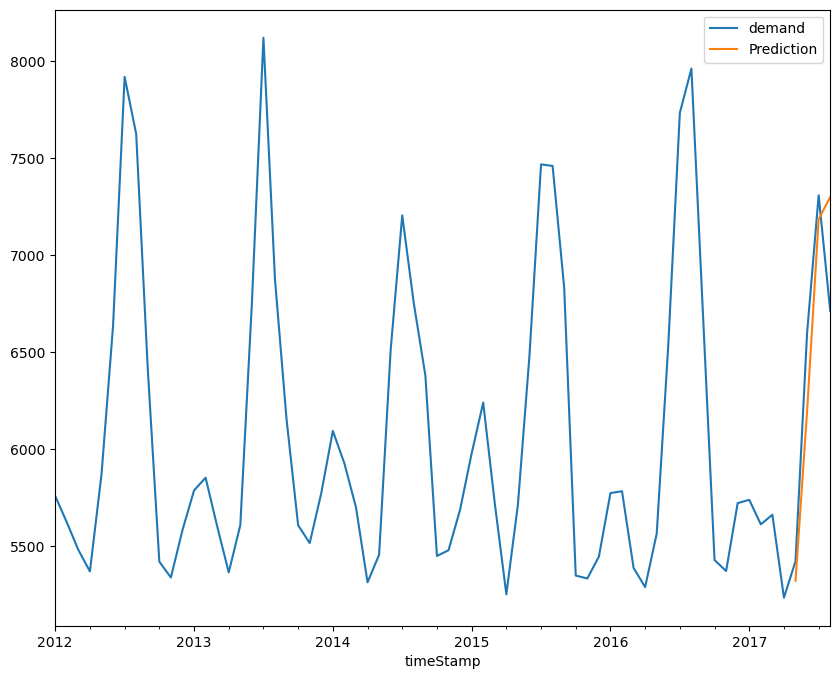

In [109]:

pd.concat([ny_df_monthly['demand'],forecast_df],axis=1).plot()

In [111]:

forecast1=model.predict(n_periods=8, return_conf_int=True)

In [113]:
forecast1

(2017-05-31    5320.832732
 2017-06-30    6194.150570
 2017-07-31    7184.108161
 2017-08-31    7297.999647
 2017-09-30    6401.927281
 2017-10-31    5789.924202
 2017-11-30    5693.039618
 2017-12-31    5951.573088
 Freq: ME, dtype: float64,
 array([[4724.37017429, 5917.29528995],
        [5391.43559664, 6996.86554311],
        [6358.61998974, 8009.59633287],
        [6467.74938768, 8128.24990638],
        [5553.64732099, 7250.20724157],
        [4934.10752026, 6645.74088286],
        [4837.08537975, 6548.99385542],
        [5094.94721594, 6808.19896066]]))

In [117]:

forecast_range=pd.date_range(start='2017-05-31', periods=8,freq='M')

C:\Users\rtekem\AppData\Local\Temp\ipykernel_25536\2354322221.py:1: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [119]:

forecast1_df = pd.DataFrame(forecast1[0],index =forecast_range,columns=['Prediction'])

<Axes: >

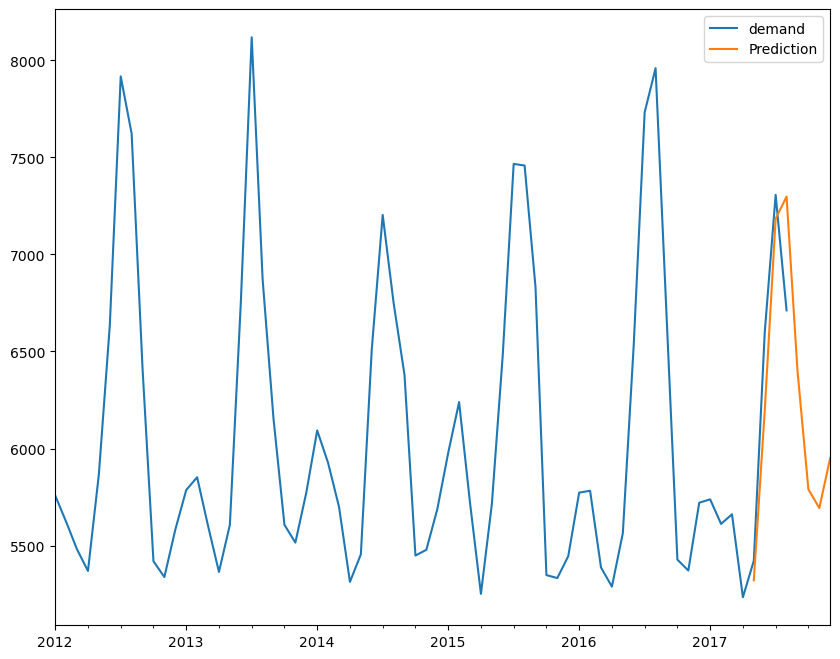

In [121]:

pd.concat([ny_df_monthly['demand'],forecast1_df],axis=1).plot()

In [123]:

lower=pd.Series(forecast1[1][:, 0], index =forecast_range)
upper=pd.Series(forecast1[1][:, 1], index =forecast_range)

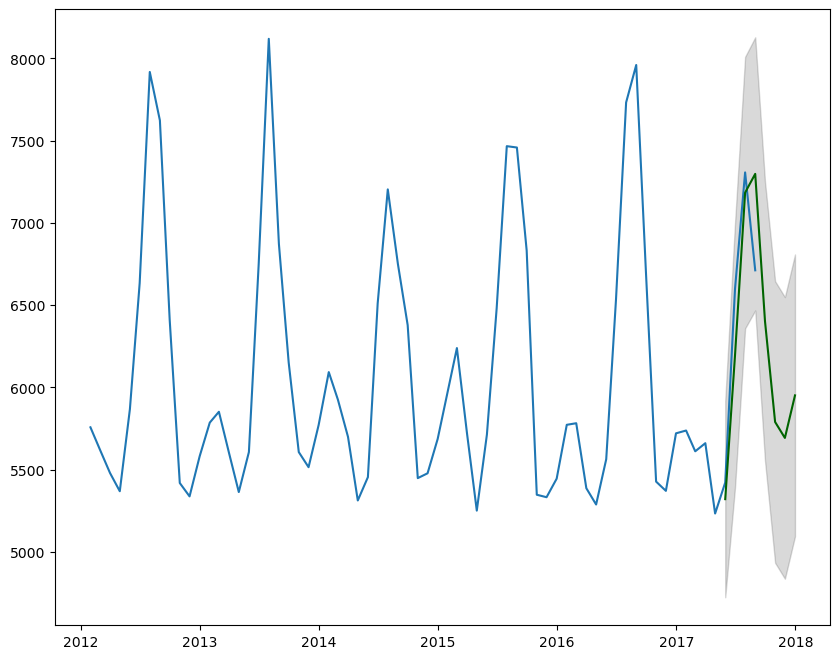

In [125]:


plt.plot(ny_df_monthly['demand'])
plt.plot(forecast1_df, color='darkgreen')
plt.fill_between(forecast_range, 
                 lower, 
                 upper, 
                 color='k', alpha=.15)
      

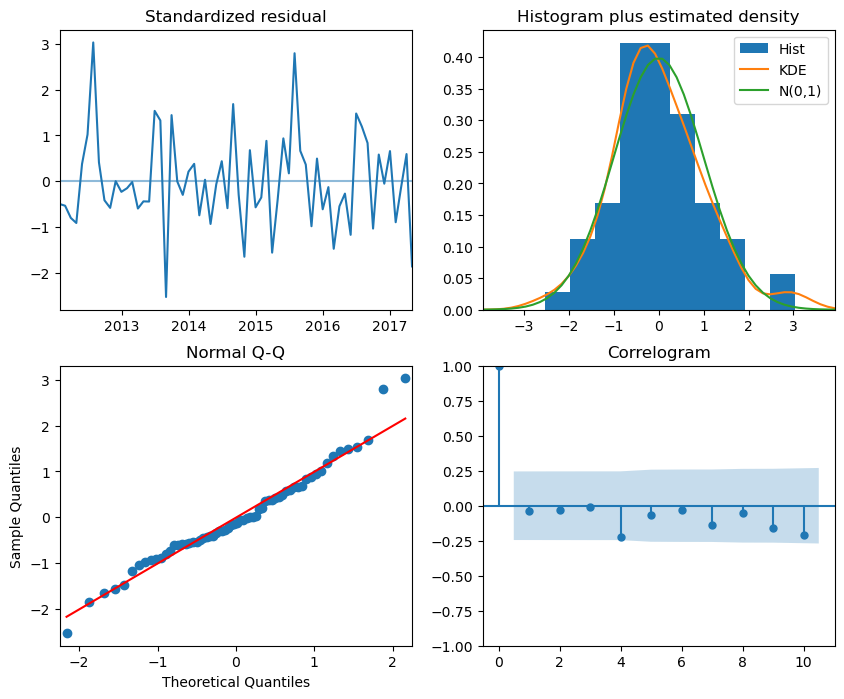

In [127]:

out=model.plot_diagnostics()

Exemple : Prédiction des Ventes d’un Magasin en Fonction de la Température

C:\Users\rtekem\AppData\Local\Temp\ipykernel_25468\4111218962.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Date": pd.date_range(start="2015-01-01", periods=60, freq="M"),


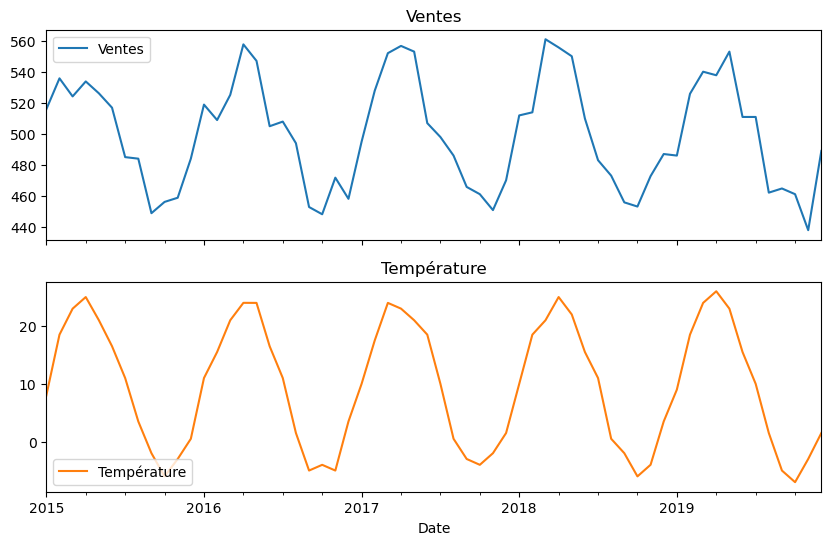

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima

# Création d'un jeu de données fictif (exemple)
data = {
    "Date": pd.date_range(start="2015-01-01", periods=60, freq="M"),
    "Ventes": [500 + 50*np.sin(i*2*np.pi/12) + np.random.randint(-20, 20) for i in range(60)],  # Saison + aléatoire
    "Température": [10 + 15*np.sin(i*2*np.pi/12) + np.random.randint(-2, 2) for i in range(60)]  # Saison + bruit
}

df = pd.DataFrame(data)
df.set_index("Date", inplace=True)

# Affichage des données
df.plot(subplots=True, figsize=(10, 6), title=["Ventes", "Température"])
plt.show()


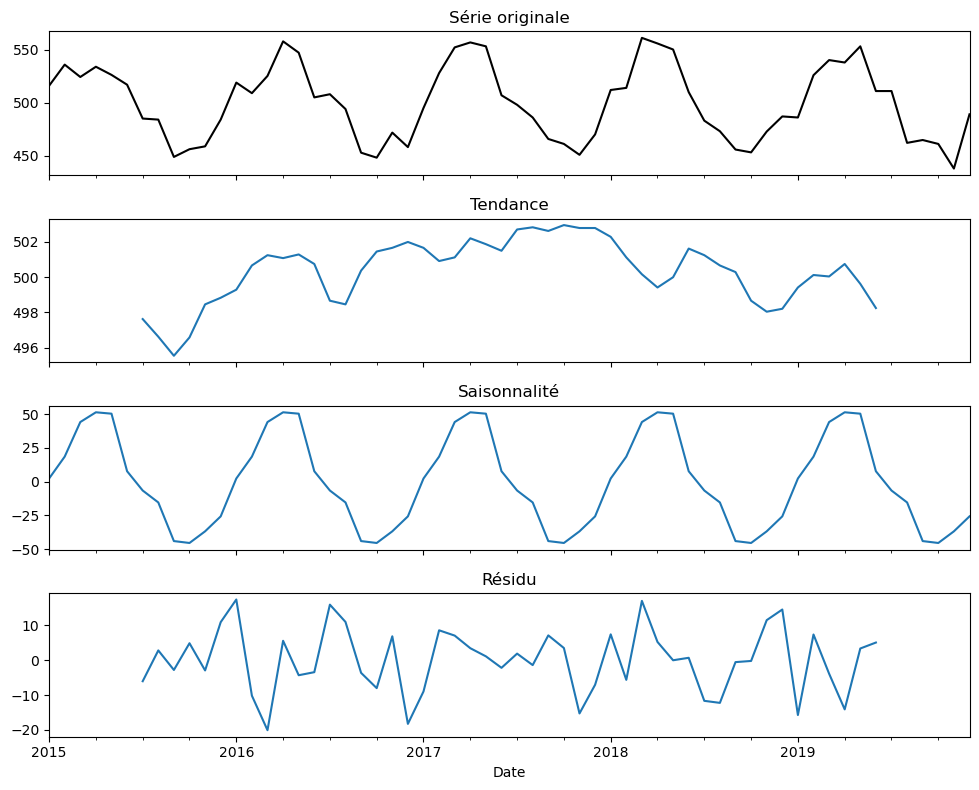

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Décomposition saisonnière
decomposition = seasonal_decompose(df["Ventes"], model="additive", period=12)

# Affichage des composantes
fig, axes = plt.subplots(4, 1, figsize=(10, 8), sharex=True)
df["Ventes"].plot(ax=axes[0], title="Série originale", color="black")
decomposition.trend.plot(ax=axes[1], title="Tendance")
decomposition.seasonal.plot(ax=axes[2], title="Saisonnalité")
decomposition.resid.plot(ax=axes[3], title="Résidu")

plt.tight_layout()
plt.show()

In [4]:
# Entraînement du modèle SARIMA avec une variable exogène
model = auto_arima(df["Ventes"],  
                   exogenous=df[["Température"]],  # Variable exogène
                   seasonal=True, m=12,  # Saison annuelle (12 mois)
                   stepwise=True, trace=True,  
                   suppress_warnings=True)

# Résumé du modèle sélectionné
print(model.summary())


C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=536.824, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=600.275, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=523.937, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=548.089, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=918.308, Time=0.01 sec


C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure

 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=550.534, Time=0.02 sec


C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=522.340, Time=0.33 sec


C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=0.54 sec


C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=531.477, Time=0.24 sec


C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=562.551, Time=0.32 sec


C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=536.633, Time=0.42 sec


C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,0)[12] intercept   : AIC=523.638, Time=0.40 sec
 ARIMA(0,0,1)(2,0,0)[12] intercept   : AIC=566.588, Time=0.17 sec


C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,1)(2,0,0)[12] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(1,0,0)(2,0,0)[12]             : AIC=inf, Time=0.11 sec

Best model:  ARIMA(1,0,0)(2,0,0)[12] intercept
Total fit time: 3.767 seconds
                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                   60
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 12)   Log Likelihood                -256.170
Date:                            Wed, 26 Mar 2025   AIC                            522.340
Time:                                    15:47:41   BIC                            532.812
Sample:                                01-31-2015   HQIC                           526.437
                                     - 12-31-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025    

C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [8]:
# Génération des températures futures (exemple)
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(1), periods=12, freq="M")
future_temp = [10 + 15*np.sin(i*2*np.pi/12) for i in range(60, 72)]  # Projection

future_exog = pd.DataFrame({"Température": future_temp}, index=future_dates)


C:\Users\rtekem\AppData\Local\Temp\ipykernel_25468\4030638017.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(1), periods=12, freq="M")


C:\Users\rtekem\AppData\Local\anaconda3\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


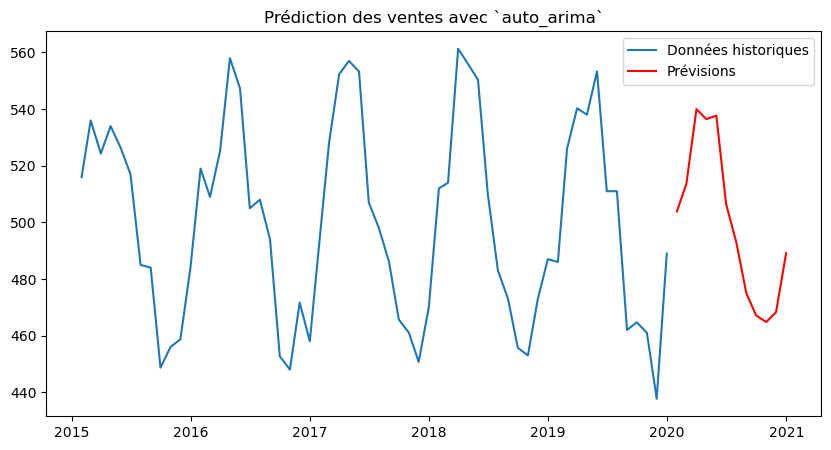

In [10]:
# Prédiction des ventes
future_forecast = model.predict(n_periods=12, exogenous=future_exog)
future_forecast = pd.Series(future_forecast, index=future_dates)

# Affichage des résultats
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["Ventes"], label="Données historiques")
plt.plot(future_forecast.index, future_forecast, label="Prévisions", color="red")
plt.legend()
plt.title("Prédiction des ventes avec `auto_arima`")
plt.show()
